In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cities_df=pd.read_csv('wojewodztwa_miasta.csv',encoding='ISO-8859-1', sep=';')
cities_df.head()

,id,nazwa miasta,nazwa wojewÃ³dztwa
0,1,BolesÅawiec,DOLNOSLASKIE
1,2,Nowogrodziec,DOLNOSLASKIE
2,3,Bielawa,DOLNOSLASKIE
3,4,DzierÅ¼oniÃ³w,DOLNOSLASKIE
4,5,Pieszyce,DOLNOSLASKIE


In [3]:
pop_df=pd.read_csv('population_31.12.2022_roku.csv', skiprows=4, sep=';')
pop_df.head()

,Wojewodztwo,Ogolem,Mezczyzni,Kobiety,Razem_Miasto,Mezczyzni_miasto,Kobiety_miasto,Razem_wies,Mezczyzni_wies,Kobiety_wies
0,POLSKA,37766327,18249321,19517006,22489926,10630651,11859275,15276401,7618670,7657731
1,Dolnoslaskie,2888033,1388123,1499910,1950542,921111,1029431,937491,467012,470479
2,Kujawsko-pomorskie,2006876,971048,1035828,1166346,549425,616921,840530,421623,418907
3,Lubelskie,2024637,980169,1044468,935128,438208,496920,1089509,541961,547548
4,Lubuskie,979976,475717,504259,629692,299949,329743,350284,175768,174516


In [4]:
cities_df.columns=['id','city','province']
cities_df=cities_df.drop(['id'],axis=1)
cities_df.head()

,city,province
0,BolesÅawiec,DOLNOSLASKIE
1,Nowogrodziec,DOLNOSLASKIE
2,Bielawa,DOLNOSLASKIE
3,DzierÅ¼oniÃ³w,DOLNOSLASKIE
4,Pieszyce,DOLNOSLASKIE


In [5]:
pop_df=pop_df.iloc[1:,0:5]
pop_df=pop_df.drop(['Mezczyzni','Kobiety'],axis=1)
pop_df.head()

,Wojewodztwo,Ogolem,Razem_Miasto
1,Dolnoslaskie,2888033,1950542
2,Kujawsko-pomorskie,2006876,1166346
3,Lubelskie,2024637,935128
4,Lubuskie,979976,629692
5,lodzkie,2378483,1468809


In [6]:
pop_df.columns=['province','pop','pop_city']
pop_df['province'] = pop_df['province'].apply(lambda x : x.upper())
pop_df.head()

,province,pop,pop_city
1,DOLNOSLASKIE,2888033,1950542
2,KUJAWSKO-POMORSKIE,2006876,1166346
3,LUBELSKIE,2024637,935128
4,LUBUSKIE,979976,629692
5,LODZKIE,2378483,1468809


In [7]:
cty_df=cities_df.groupby(['province'],as_index=False).count()
cty_df=cty_df.replace('SWIETOKRZYSKIE','SWIETOKRZYSKIE')
cty_df

,province,city
0,DOLNOSLASKIE,91
1,KUJAWSKO-POMORSKIE,52
2,LODZKIE,44
3,LUBELSKIE,46
4,LUBUSKIE,42
5,MALOPOLSKIE,61
6,MAZOWIECKIE,85
7,OPOLSKIE,35
8,PODKARPACKIE,51
9,PODLASKIE,40


In [8]:
df_merged = pd.merge(pop_df, cty_df, on='province', how='inner')
df_merged

,province,pop,pop_city,city
0,DOLNOSLASKIE,2888033,1950542,91
1,KUJAWSKO-POMORSKIE,2006876,1166346,52
2,LUBELSKIE,2024637,935128,46
3,LUBUSKIE,979976,629692,42
4,LODZKIE,2378483,1468809,44
5,MALOPOLSKIE,3429014,1640055,61
6,MAZOWIECKIE,5510612,3562901,85
7,OPOLSKIE,942441,498469,35
8,PODKARPACKIE,2079098,854227,51
9,PODLASKIE,1143355,695787,40


In [9]:
df_merged['%city_pop']=df_merged['pop_city']/df_merged['pop']
df_merged

,province,pop,pop_city,city,%city_pop
0,DOLNOSLASKIE,2888033,1950542,91,0.675388
1,KUJAWSKO-POMORSKIE,2006876,1166346,52,0.581175
2,LUBELSKIE,2024637,935128,46,0.461874
3,LUBUSKIE,979976,629692,42,0.642559
4,LODZKIE,2378483,1468809,44,0.617540
5,MALOPOLSKIE,3429014,1640055,61,0.478288
6,MAZOWIECKIE,5510612,3562901,85,0.646553
7,OPOLSKIE,942441,498469,35,0.528913
8,PODKARPACKIE,2079098,854227,51,0.410864
9,PODLASKIE,1143355,695787,40,0.608549


In [10]:
#pip install adjustText

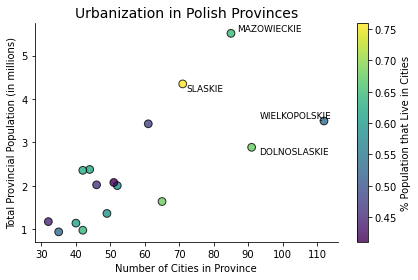

In [11]:

fig, ax = plt.subplots(figsize=(6, 4))

sc = ax.scatter(
    df_merged['city'],
    df_merged['pop'] /1e6,
    c=df_merged['%city_pop'],
    s=60,
    edgecolor='black',
    alpha=0.8
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Urbanization in Polish Provinces', fontsize=14)
ax.set_xlabel('Number of Cities in Province')
ax.set_ylabel('Total Provincial Population (in millions)')


cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('% Population that Live in Cities')

from adjustText import adjust_text
texts = []
for i, row in df_merged.iterrows():
    if row['pop'] > 4e6 or row['city'] > 90:
        texts.append(ax.text(row['city'], row['pop'] / 1e6, row['province'], fontsize=9))
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', lw=0.5))


plt.tight_layout()
#plt.savefig("city_population_refined.png", dpi=300)
plt.show()